In [242]:
from firebase import firebase
import pandas as pd
from datetime import datetime
import seaborn as sns

def date_converter(num):
    a = str(datetime.fromtimestamp(float(num)/1000.0))
    return a[11:16]

def graph_generator():
    firebas = firebase.FirebaseApplication('https://androidtemplate-f6fce-default-rtdb.firebaseio.com/', None)
    result = firebas.get('/report/results/', '')
    df = pd.DataFrame(result.items(), columns=["time", "emotion"])
    df1 = df['emotion']
    arr = df1.values
    
    now = 0
    x_perc = []
    for i in range(1,arr.shape[0]+1):   
        if(arr[i-1] == 'positive'):
            now +=1
        else:
            now -=1      
        dev = now/i * 100
        x_perc.append(dev)
    
    
        now = 0
        x_cat = []
    for i in range(1,arr.shape[0]+1):   
        if(arr[i-1] == 'positive'):
            now = 0
        else:
            now =1      

        x_cat.append(now)
            
        
    df5 = df['time']
    arr5 = df5.values
        
    y_time = []
        
    for i in range(1,arr5.shape[0]+1):
        y_time.append(date_converter(arr5[i-1]))
            
    df = pd.DataFrame(list(zip(x_perc,x_cat,y_time)), columns=['x_perc', 'x_cat','y_time'])
        
    df.to_csv('data.csv')
        
    df= pd.read_csv('./data.csv')
        
    counting=[]
    for i in range(arr.shape[0]):
        counting.append(i)
        
    
    return df, y_time,x_perc,x_cat,counting

In [243]:
df, y_time,x_perc,x_cat,counting = graph_generator()

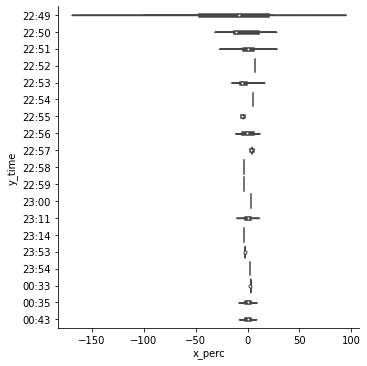

In [244]:
plot1 = sns.catplot(data=df, kind="violin", y="y_time", x="x_perc")

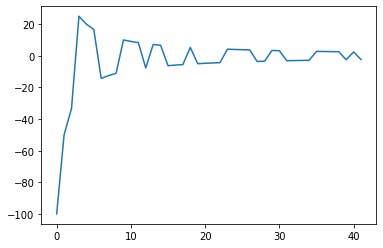

In [245]:
plot2 = plt.plot(x_perc)

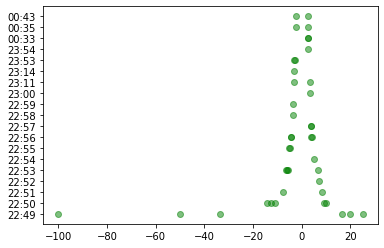

In [246]:
plot3 = plt.scatter(x_perc, y_time, c="g", alpha=0.5)

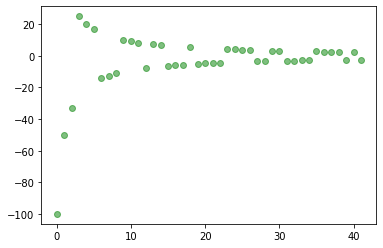

In [247]:
plot4 = plt.scatter(counting, x_perc, c="g", alpha=0.5)